# MF모델을 기반으로한 영화 및 장르 추천 시스템 예제

#### 초록
***
<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; 
'Movielens' 데이터셋을 이용하여 MF 모델의 영화 및 장르 추천 시스템을 생성하고 평가 하였다. '데이터 분석', '데이터 전처리', '영화 추천 모델 생성 및 평가', '장르 추천 모델 생성 및 평가' 순으로 이루어졌다. 데이터 분석 결과 데이터셋의 레코드는 총 1,000,209개로 유저의 영화에 대한 평가 정도를 나타내 데이터로 구성되어 있었으며, 총 3,883편의 영화와 18개의 장르, 6,040명의 이용자로 구성되어있음을 확인하였다. 영화 추천 모델을 생성하기위해 이용자 6,040명과 영화 3,628편에 대한 CSR 행렬을 생성 하였다. 모델을 생성한 후, 벡터 차원 크기는 512로 설정하고 4회 학습 하였다. 특정 이용자가 선호한 영화인 『forrest gump (1994)』와 아직 시청하지 않은 영화인 『welcome to the dollhouse (1995)』 - 유저 벡터 간의 내적을 확인하였다. 그 결과 0.921과 -0.044로 선호한 영화에 대해 높은 값이 도출되었다. 특정 이용자가 선호한 영화와 비슷한 영화 목록을 제시하는 예제와 특정 이용자가 선호할 만한 영화의 목록을 제시하는 예제를 진행하였다. 『forrest gump (1994)』와 비슷한 영화로는 『soft fruit (1999)』, 『shopping (1994)』, 『gate ii: trespassers, the (1990)』등의 개봉 시기가 비슷한 영화가 추천되었으며, 특히 『soft fruit (1999)』는 '코미디 드라마'로 『forrest gump (1994)』와 비슷한 장르의 영화에 해당한다. 특정 이용자에게 『matrix, the (1999)』, 『braveheart (1995)』, 『total recall (1990)』 등의 영화가 추천 되었으며, 그중 『total recall (1990)』 추천에 기여된 정도를 확인한 결과, 『terminator 2: judgment day (1991)』, 『men in black (1997)』이 각각 0.115, 0.079 만큼 기여하였으며, 세 영화 모두 SF 장르로 높은 관련이 있음을 확인 하였다. 이후, 장르 추천 모델 생성 및 평가 예제를 진행 하였다. 앞선, 영화 추천 모델 예제와 동일한 방식으로 진행하였다.






</span>

***

<br>

## 1. 서론
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 본 예제에서는 'Movielens' 데이터셋을 사용하여, MF(Matrix Factorization) 모델을 바탕으로 영화 추천 시스템을 생성하고 평가하고자 합니다. 나아가 주어진 데이터셋의 '장르' 데이터를 활용하여, 장르 추천 시스템을 생성하고 평가 합니다. MF 모델은 행렬 분해를 통해 데이터 크기를 줄이면서도 준수한 성능을 보여줍니다. 모델 생성 및 평가에 앞서 데이터셋을 분석한 후, 데이터 전처리를 시행하고자 합니다. 예제의 진행 순서는 다음과 같습니다.
</span><br><br>


> _1. 데이터 분석_
>
> _2. 데이터 전처리_
>
> _3. 영화 추천 모델 생성 및 평가_
>
> _4. 장르 추천 모델 생성 및 평가_


***

<br>

## 2. 데이터 분석
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 모델 생성과 평가에 앞서 주어진 데이터셋을 분석하는 과정을 진행합니다. 데이터셋의 구성 형태와 크기 등의 기본적인 사항을 알아봅니다. 이후, 구체적인 데이터 분석을 위해 영화 개봉일자나 평가시기를 추출하는 등의 데이터 정제를 거칩니다. 이를 바탕으로 이용자 수, 시기별 평점 레코드 개수와 같은 구체적인 정보를 확인 합니다.
</span>

***

### 2.1. 사전 데이터 분석
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 데이터셋은 두 개로 '메인 데이터셋'과 '영화 정보 데이터셋' 입니다. 메인 데이터셋은 이용자(user_id)와 영화(movie_id)의 순차코드 그리고 이용자의 영화에 대한 평가(rating), 평가가 이루어진 시기(timestamp)로 구성되어 있습니다. 영화 정보 데이터셋은 영화의 순차코드(movie_id)와 영화제목(title), 장르(genre)로 구성되어 있습니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 메인 데이터셋은 1,000,209개의 레코드로 이루어져 있습니다. 영화 정보 데이터셋은 3,883개의 레코드로 이루어져 있습니다. 이를 통하여, 데이터셋에서 다루는 영화는 총 3,883개임을 알 수 있습니다. 또한, 영화 장르는 총 18개 입니다.
</span>

***

#### 필요 라이브러리 호출
***
+ 본 예제에서 사용할 라이브러리를 호출 합니다.
***

In [1]:
import os   #디렉토리 관리 및 implicit 권장 사항
import matplotlib.pyplot as plt   #데이터 시각화

import math   #평가와 시청수를 고려한 점수화
import time   #timestamp => time
from datetime import datetime   #timestamp => time

import numpy as np   #행렬 연산
import pandas as pd   #데이터셋 작업
from scipy.sparse import csr_matrix   #csr 행렬 생성
from implicit.als import AlternatingLeastSquares   #추천 모델 생성

# implicit 라이브러리에서 권장 사항========
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'
#End=======================================

<br>

#### 메인 데이터셋 불러오기
***
+ 메인 데이터의 레코드 개수는 1,000,209개 입니다.
***

In [2]:
mian_data_path = './recommendata_iu/data/ml-1m/ratings.dat'   #데이터셋 path
mian_data_cols = ['user_id', 'movie_id', 'rating', 'timestamp']   #열 이름


main_data = pd.read_csv(   #csv 불러오기
    mian_data_path,   #데이터셋 경로
    sep='::',   #'::' 기준으로 분할
    names=mian_data_cols,   #열 이름
    engine='python',
    encoding = "ISO-8859-1"
)


#출력부=============================
print("*" * 35)
print("『mian_data』 size:", len(main_data))   #레코드 개수 출력
print("*" * 35)

main_data.head(5)
#End================================

***********************************
『mian_data』 size: 1000209
***********************************


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


<br>

#### 영화 정보 데이터셋 불러오기
***
+ 영화 정보 데이터셋의 레코드 개수는 3,883개 입니다.
+ 영화 정보 데이터셋의 레코드는 각각의 영화를 의미하므로 사용되는 영화는 총 3,883개 임을 알 수 있습니다.
***

In [3]:
movie_name_data_path = './recommendata_iu/data/ml-1m/movies.dat'   #영화 이름 데이터 경로
movie_name_data_cols = ['movie_id', 'title', 'genre']   #속성 이름


movie_name_data = pd.read_csv(   #csv 불러오기
    movie_name_data_path,   #데이터셋 경로
    sep='::',   #'::' 기준으로 분할
    names=movie_name_data_cols,   #열 이름
    engine='python',
    encoding='ISO-8859-1'
)


#출력부=============================
print("*" * 35)
print("『movie_name_data』 size:", len(movie_name_data))   #레코드 개수 출력
print("*" * 35)

movie_name_data.head()
#End================================

***********************************
『movie_name_data』 size: 3883
***********************************


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


<br>

#### 영화 장르 종류 확인
***
+ 영화 정보 데이터셋의 `genre` 속성을 바탕으로 데이터셋의 영화들의 장르 종류를 확인 합니다.
+ 총 18개의 장르가 있음을 확인 할 수 있습니다.
***

In [4]:
genre_attribute = movie_name_data["genre"]

genre_set = set()
for _, raw_data in genre_attribute.items():
    data = raw_data.split("|")
    genre_set.update(data)


#출력부========================
print("*" * 32)
for genre in genre_set:
    print(genre)
print("*" * 32)

print("genre num:", len(genre_set))
#End===========================

********************************
Sci-Fi
Romance
Drama
Children's
War
Action
Thriller
Mystery
Fantasy
Western
Horror
Adventure
Crime
Musical
Animation
Comedy
Documentary
Film-Noir
********************************
genre num: 18


<br>

### 2.2. 데이터 분석을 위한 데이터 정제
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 조금 더 자세한 데이터 분석을 위해 데이터 정제를 진행하고자 합니다. 우선, 메인 데이터셋과 영화 정보 데이터셋을 'movie_id'를 기준으로 결합 합니다. 또한, 이용자가 평가를 한 년도를 'timestamp' 속성으로부터 추출 합니다. 이후, 영화 제목과 함께 기록되어있는 개봉 년도를 추출 합니다.
</span>

***

<br>

#### 'movie_id' 속성을 기준으로한 데이터 결합
***
+ `movie_id` 속성을 기준으로 '메인 데이터셋'과 '영화 정보 데이터셋'을 결합 합니다.
***

In [5]:
#movie_id를 기준으로 병합
analy_data = main_data.join(movie_name_data.set_index("movie_id"), on="movie_id")
analy_data.drop(["movie_id"], axis=1, inplace=True)   #movie_id 제거


#출력부================
analy_data.head(5)
#End===================

,user_id,rating,timestamp,title,genre
0,1,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,4,978300275,Erin Brockovich (2000),Drama
4,1,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


<br>

#### timestamp로부터 년도 추출 하기
***
+ `timestamp`는 이용자의 평가 시점을 unix time 형식으로 기록한 것입니다.
+ 이를 바탕으로 년도를 추출 하여 `timestamp` 속성을 대체 합니다.
***

In [6]:
#timestamp => time
analy_data["timestamp"] = analy_data["timestamp"].apply(
    lambda x: datetime.fromtimestamp(x).year
)


#출력부================
analy_data.head(5)
#End===================

,user_id,rating,timestamp,title,genre
0,1,5,2000,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,3,2000,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,3,2000,My Fair Lady (1964),Musical|Romance
3,1,4,2000,Erin Brockovich (2000),Drama
4,1,5,2001,"Bug's Life, A (1998)",Animation|Children's|Comedy


<br>

#### 영화 개봉 년도 분할 하기
***
+ `title` 속성은 '영화 제목 + 개봉년도' 형식으로 기록되어 있습니다.
+ 따라서, 영화 제목과 개봉 년도를 분할 합니다.
***

In [7]:
movie_year = analy_data["title"]
movie_year = movie_year.apply(lambda x: x[-5:-1])

analy_data["title"] = analy_data["title"].apply(lambda x: x[:-7])
analy_data["movie_year"] = movie_year


#출력부================
analy_data.head(5)
#End===================

,user_id,rating,timestamp,title,genre,movie_year
0,1,5,2000,One Flew Over the Cuckoo's Nest,Drama,1975
1,1,3,2000,James and the Giant Peach,Animation|Children's|Musical,1996
2,1,3,2000,My Fair Lady,Musical|Romance,1964
3,1,4,2000,Erin Brockovich,Drama,2000
4,1,5,2001,"Bug's Life, A",Animation|Children's|Comedy,1998


<br>

### 2.3. 데이터 분석
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 전처리를 통해 얻은 데이터를 바탕으로 다시 데이터 분석을 진행 합니다. 본 데이터셋의 이용자 수, 연도별 평점 레코드 개수, 영화 개봉 연도별 평점 레코드 개수 등의 정보를 확인 합니다. 나아가 '알파고 제로'에서 사용된 노드 평가 공식을 사용하여 '평점'과 '관람 수'를 기반으로 인기 순 30개의 영화를 제시 합니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 데이터셋의 총 이용자 수는 6,040명 이며, 2000년에 영화에 대해 904,757번의 평가가 이루어 진 것을 확인 하였습니다.
또한, 과거의 영화보다 최신 영화에 대한 평가가 더 많이 이루어 진 것을 확인 하였습니다.
</span><br><br>

***

#### 총 이용자 수
***
+ 총 이용자 수는 6,040명 입니다.
***

In [8]:
user_num = analy_data['user_id'].nunique()   # 이용자 수


#출력부================
print("*" * 35)
print("user num:", user_num)
print("*" * 35)
#End===================

***********************************
user num: 6040
***********************************


<br>

#### 연도별 평점 레코드 개수
***
+ 2000년에 영화에 대한 평가는 904,757번으로 다른 시기에 비해 압도적으로 많은 평가가 이루어졌습니다.
***

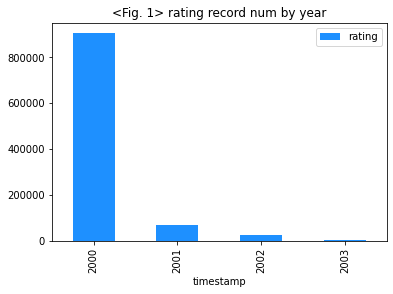

,rating
timestamp,
2000,904757
2001,68058
2002,24046
2003,3348


In [9]:
year_data = analy_data[["rating", "timestamp"]]
year_data = year_data.groupby("timestamp").count()


#출력부================
year_data.plot.bar(color="#1e90ff", title="<Fig. 1> rating record num by year")
plt.show()

year_data
#End===================

<br>

#### 영화 개봉 연도별 평점 레코드 개수
***
+ 최신 영화일수록 더 많은 평가가 이루어진 것을 확인할 수 있습니다.
***

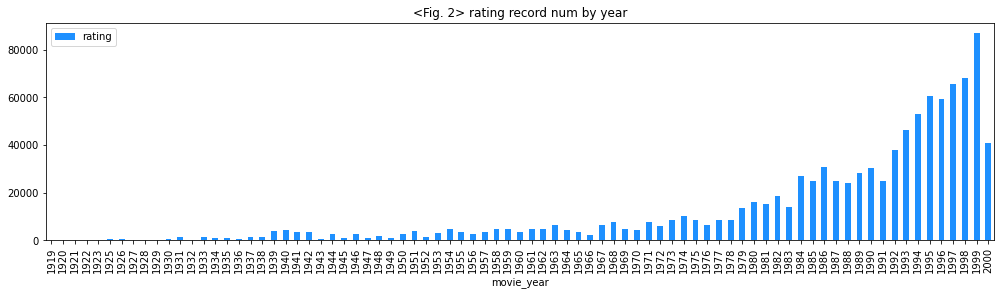

In [10]:
year_data = analy_data[["rating", "movie_year"]]
year_data = year_data.groupby("movie_year").count()


#출력부================
year_data.plot.bar(color="#1e90ff", title="<Fig. 2> rating record num by year", figsize=(17, 4))
plt.show()
#End===================

<br>

#### 이용자별 영화 시청 통계
***
+ 6,040명 이용자별 영화 시청 통계를 확인합니다.
+ 1인당 약 165편의 영화를 시청하였습니다.
+ 가장 적게 시청한 이용자는 20편, 가장 많이 시청한 이용자는 2,314편의 영화를 시청하였습니다.
***

In [11]:
user_count = analy_data.groupby('user_id')['title'].count()   # 이용자별 영화 시청 통계


#출력부================
user_count.describe()
#End===================

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: title, dtype: float64

<br>

#### 이용자별 영화 평점 통계
***
+ 6,040명의 이용자별 영화 평점 통계를 제시 합니다.
+ 이용자는 대체로 3.84의 평가를 하는 것을 확인 할 수 있습니다.
***

In [12]:
user_median = analy_data.groupby('user_id')['rating'].median()   # 이용자별 별점 중앙값에 대한 통계


#출력부================
user_median.describe()
#End===================

count    6040.000000
mean        3.840811
std         0.577449
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

<br>

#### Best 30 영화 제시
***
+ 영화 평점과 관람수를 함께 고려하여 Best 30개의 영화를 제시 합니다.
+ 점수화를 위해 알파고 제로에서 사용한 노드 평가 수식을 변형하여 사용하였습니다.
***


$$Q + cP\frac{\sqrt{N}}{n}$$

__ALPHAGO ZERO__
+ _Q: 가지별 모든 방문에 대한 평균 기댓값_
+ _P: 후보 수의 사전확률_
+ _c: 탐색 균형 요소_
+ _N: 부모 노드의 방문 횟수_
+ _n: 자식 가지의 방문 횟수_


+ c를 조절하여 실제 방문한 노드와 그렇지 않은 노드의 균형을 맞추어 방문할 노드를 선택한다.
***

<br>

***
$$Q - c\frac{\sqrt{N}}{n}$$

__OWN FUNCTION__
+ _Q: 영화 평균 평점_
+ _c: 균형 요소_
+ _N: 전체 영화 관람 수_
+ _n: 영화 관람 수_


+ 영화 평균 평점을 기반으로 영화 관람 수가 많을 수록 높은 점수가 되도록 한다.
+ c는 알파고 제로에서 제시한 기본 값인 sqrt(2)를 사용한다.
***

#### 수식 출처
***
+ Max Pumperla & Kevin Ferguson, 『Deep Learning and the Game of Go』, 한빛미디어(2020), 379
***

In [13]:
view_count = analy_data.groupby('title')["user_id"].count()
rating_mean = analy_data.groupby('title')["rating"].mean()

N, c = view_count.sum(), math.sqrt(2)

#Q - c * 1 * (sqrt(N) / n)
own_value_sys = rating_mean - c * (math.sqrt(N) / view_count)
own_value_sys.sort_values(ascending=False, inplace=True)


#출력부================
print(own_value_sys.head(30))
#End===================

title
Star Wars: Episode IV - A New Hope                3.980822
Shawshank Redemption, The                         3.919461
Raiders of the Lost Ark                           3.915131
American Beauty                                   3.904795
Schindler's List                                  3.896545
Godfather, The                                    3.888726
Sixth Sense, The                                  3.831085
Star Wars: Episode V - The Empire Strikes Back    3.819946
Saving Private Ryan                               3.804236
Silence of the Lambs, The                         3.803196
Matrix, The                                       3.769745
Usual Suspects, The                               3.723858
Princess Bride, The                               3.693546
Fargo                                             3.691858
Braveheart                                        3.656013
Pulp Fiction                                      3.626734
L.A. Confidential                                 

<br>

## 3. 데이터 전처리
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 앞서 진행한 데이터 분석을 통해 얻은 정보를 토대로 데이터를 전처리 합니다. 우선, 3점 미만의 점수를 받은 경우는 추천하지 않는 것으로 판단하고 제외 합니다. 또한, 검색의 용의성을 위해 'title' 속성의 데이터를 소문자로 변경 합니다. 최종적으로 평가를 위해 새로운 이용자의 정보를 추가합니다.
</span>

***

#### 3점 미만 평점 데이터 제외
***
+ 3점 미만의 평점을 받은 레코드는 추천하지 않는 것으로 간주하고 제외 합니다.
***

In [14]:
data = main_data.drop(["timestamp"], axis=1)
data = data[data['rating'] >= 3]   #3점 이상


#출력부================
data.head(5)
#End===================

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


<br>

#### 문자열 소문자로 변경
***
+ 검색의 용의성을 위해 영화 제목을 소문자로 변경 합니다.
***

In [15]:
movie_name_data['title'] = movie_name_data['title'].str.lower()


#출력부================
movie_name_data.head(5)
#End===================

,movie_id,title,genre
0,1,toy story (1995),Animation|Children's|Comedy
1,2,jumanji (1995),Adventure|Children's|Fantasy
2,3,grumpier old men (1995),Comedy|Romance
3,4,waiting to exhale (1995),Comedy|Drama
4,5,father of the bride part ii (1995),Comedy


<br>

#### 'movie_id'를 기준으로 데이터 결합
***
+ `movie_id`를 기준으로 데이터를 결합 합니다.
***

In [16]:
data = data.join(movie_name_data.set_index("movie_id"), on="movie_id")   #데이터 결합
data.drop(["movie_id", "genre"], axis=1, inplace=True)


#출력부================
data.head(5)
#End===================

,user_id,rating,title
0,1,5,one flew over the cuckoo's nest (1975)
1,1,3,james and the giant peach (1996)
2,1,3,my fair lady (1964)
3,1,4,erin brockovich (2000)
4,1,5,"bug's life, a (1998)"


<br>

#### 이용자 정보 입력하기
***
+ 이후 모델 평가에 사용하기 위한 새로운 데이터를 입력합니다.
+ `YAGI`라는 이용자가 `forrest gump`, `shawshank redemption, the` 등의 총 5개의 영화를 5번 관람 한 것으로 입력합니다.
***

In [17]:
#좋아하는 영화 리스트==========
my_favorite = [
    "forrest gump (1994)",
    "shawshank redemption, the (1994)",
    "men in black (1997)",
    "terminator 2: judgment day (1991)",
    "jurassic park (1993)"
]

my_playlist = pd.DataFrame({
    'user_id': ["YAGI"]*5,
    'title': my_favorite,
    'rating':[5] * 5,
})
#End===========================


if not data.isin({'user_id':["YAGI"]})['user_id'].any():
    data = data.append(my_playlist)   #데이터 추가하기

    
#출력부================    
data.tail(10)
#End===================

,user_id,rating,title
1000203,6040,3,platoon (1986)
1000205,6040,5,"crying game, the (1992)"
1000206,6040,5,welcome to the dollhouse (1995)
1000207,6040,4,sophie's choice (1982)
1000208,6040,4,e.t. the extra-terrestrial (1982)
0,YAGI,5,forrest gump (1994)
1,YAGI,5,"shawshank redemption, the (1994)"
2,YAGI,5,men in black (1997)
3,YAGI,5,terminator 2: judgment day (1991)
4,YAGI,5,jurassic park (1993)


<br>

#### 'title' 및 'user_id' 고유키로 변환하기
***
+ `title`, `user_id` 속성을 인덱싱하여 연산의 효율성을 높여줍니다.
***

In [18]:
user_unique = data['user_id'].unique()   #user_id unique 리스트
movie_unique = data['title'].unique()   #title unique 리스트


#value <===> idx를 위한 정보 기록====
user_to_idx = {v:k for k,v in enumerate(user_unique)}   #{user_id: idx}
item_to_idx = {v:k for k,v in enumerate(movie_unique)}   #{title: idx}

idx_to_item = {v:k for k,v in item_to_idx.items()}
#End=================================


temp_user_data = data['user_id'].map(user_to_idx.get).dropna()   #비정상 레코드 제거


#user_id++++++++++++++++++++++++++++++
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # 'user_id'를 고유키로 변환
else:
    print('user_id column indexing Fail!!')
#End++++++++++++++++++++++++++++++++++


#title++++++++++++++++++++++++++++++++
temp_movie_data = data['title'].map(item_to_idx.get).dropna()
if len(temp_movie_data) == len(data):
    print('title column indexing OK!!')
    data['title'] = temp_movie_data
else:
    print('title column indexing Fail!!')
#End++++++++++++++++++++++++++++++++++
    
    
#출력부===============================
data.head(5)
#End==================================

user_id column indexing OK!!
title column indexing OK!!


,user_id,rating,title
0,0,5,0
1,0,3,1
2,0,3,2
3,0,4,3
4,0,5,4


<br>

## 4. 영화 추천 모델 생성 및 평가
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 영화 추천 모델을 생성하고 평가 합니다. CSR 행렬을 우선적으로 생성한 후, 이를 바탕으로 MF 모델을 만듭니다. 영화 추천 모델의 벡터의 차원 크기는 512로 설정하고, 학습은 4회 반복 합니다. 이후 모델 평가 단계에서는 특정 이용자가 선호하는 영화와 그렇지 않은 영화의 내적을 확인합니다. 또한, 특정 이용자가 선호하는 영화와 비슷한 영화 목록을 제시합니다. 최종적으로 특정 이용자가 선호할 영화를 제시하고 해당 영화를 추천한 이유를 파악하기 위해 추천에 기여한 영화를 확인 합니다.
</span>

***

### 4.1. 모델 생성 및 학습
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 이용자 6,040명과 영화 3,628편에 대한 CSR 행렬을 만듭니다. 이를 바탕으로 MF 모델을 생성 합니다. 모델의 벡터 차원 크기는 작성자의 시행착오를 토대로 512로 설정하였으며, 학습은 4회 반복하였습니다.
</span>

***

#### CSR Matrix 생성
***
+ 이용자 6,040명과 영화 3,628편에 대한 CSR 행렬을 생성 합니다.
***

In [19]:
num_user = data['user_id'].nunique()   #user_id의 유니크한 value 개수
num_movie = data['title'].nunique()   #title의 유니크한 value 개수


#csr 행렬 생성=========================
csr_data = csr_matrix(
    (data["rating"],
     (data.user_id, data.title)),
    shape=(num_user, num_movie)
)

csr_data_transpose = csr_data.T   #행, 열 전환
#End==================================


#출력부===============================
print("*" * 35)
print("user num:", num_user)
print("movie num:", num_movie)
print("*" * 35)

csr_data_transpose
#End==================================

***********************************
user num: 6040
movie num: 3628
***********************************


<3628x6040 sparse matrix of type '<class 'numpy.longlong'>'
	with 836483 stored elements in Compressed Sparse Column format>

<br>

#### 모델 생성
***
+ MF 모델을 생성 합니다.
+ 벡터 차원 크기는 512, 학습 횟수는 4회 반복 합니다.
***

In [20]:
als_model = AlternatingLeastSquares(
    factors=512,   #user 및 movie vector 차원
    regularization=0.01,   #정규화 값
    use_gpu=False,   #GPU 사용 여부
    iterations=4,   #epochs
    dtype=np.float32
)

<br>

#### 모델 학습
***
+ 모델을 학습 합니다.
***

In [21]:
als_model.fit(csr_data_transpose)

  0%|          | 0/4 [00:00<?, ?it/s]

<br>

### 4.2. 모델 평가
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 학습한 모델을 평가 합니다. 평가는 '선호 영화와 그렇지 않은 영화에 대한 내적 비교하기', '특정 이용자가 선호하는 영화와 비슷한 영화 제시하기', '특정 이용자가 선호할만한 영화 제시' 순으로 이루어 집니다.
</span>

***

#### user_id와 movie_id 크기
***
+ 이용자 벡터와 영화 벡터의 크기는 512로 동일합니다.
***

In [22]:
user_idx, gump_idx = user_to_idx["YAGI"], item_to_idx["forrest gump (1994)"]
user_vector = als_model.user_factors[user_idx]
gump_vector = als_model.item_factors[gump_idx]


#출력부===============================
print("*" * 35)
print("user vector shape:", user_vector.shape)
print("gump vector shape:", gump_vector.shape)
print("*" * 35)
#End==================================

***********************************
user vector shape: (512,)
gump vector shape: (512,)
***********************************


<br>

#### 특정 이용자의 선호 영화와 그렇지 않은 영화에 대한 내적
***
+ `YAGI` 이용자가 선호한 `『forrest gump (1994)』`의 내적은 0.921로 높게 나왔습니다.
+ `YAGI` 이용자가 아직 시청하지 않은 `『welcome to the dollhouse (1995)』`의 내적은 -0.044로 낮게 나왔습니다.
***

In [23]:
other = item_to_idx["welcome to the dollhouse (1995)"]
other_vector = als_model.item_factors[other]


#출력부===============================
print("*" * 35)
print("user - 『forrest gump (1994)』:", round(np.dot(user_vector, gump_vector), 3))
print("user -『welcome to the dollhouse (1995)』:", round(np.dot(user_vector, other_vector), 3))
print("*" * 35)
#End==================================

***********************************
user - 『forrest gump (1994)』: 0.921
user -『welcome to the dollhouse (1995)』: -0.044
***********************************


<br>

### 4.2.1 특정 이용자가 선호하는 영화와 비슷한 영화 제시
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 『forrest gump (1994)』와 비슷한 영화를 제시 합니다. 그 결과, 『soft fruit (1999)』, 『shopping (1994)』, 『gate ii: trespassers, the (1990)』등의 개봉 시기가 비슷한 영화가 추천되었습니다. 특히 『soft fruit (1999)』는 '코미디 드라마'로 『forrest gump (1994)』와 비슷한 장르의 영화에 해당합니다.
</span>

***

In [24]:
#비슷한 item 출력 함수==========================
def print_similar_item(item_name, idx_to_item, num=5):
    item_idx = item_to_idx[item_name]
    
    #movie_idx와 비슷한 movie 제시
    similar_item = als_model.similar_items(item_idx, N=num)


    #출력부===============================
    print("*" * 35)
    for item_idx, norm in similar_item:
        print(idx_to_item[item_idx] + ":", round(norm, 3))
    print("*" * 35)
    #End==================================
#End============================================ 


print_similar_item("forrest gump (1994)", idx_to_item, num=15)

***********************************
forrest gump (1994): 1.0
soft fruit (1999): 0.482
shopping (1994): 0.48
gate ii: trespassers, the (1990): 0.479
full speed (1996): 0.478
ugly, the (1997): 0.476
battle of the sexes, the (1959): 0.476
jar, the (khomreh) (1992): 0.475
circus (2000): 0.475
snowriders (1996): 0.475
carriers are waiting, the (les convoyeurs attendent) (1999): 0.475
identification of a woman (identificazione di una donna) (1982): 0.475
sprung (1997): 0.475
closer you get, the (2000): 0.475
miss julie (1999): 0.474
***********************************


<br>

### 4.2.2 특정 이용자가 선호할 영화 제시
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 이용자 'YAGI'가 선호할만한 영화를 제시 합니다. 그 결과 『matrix, the (1999)』, 『braveheart (1995)』, 『total recall (1990)』 등의 영화가 추천 되었습니다. 그중 『total recall (1990)』 추천에 기여된 정도를 확인하였습니다. 『terminator 2: judgment day (1991)』, 『men in black (1997)』이 각각  0.115, 0.079 만큼 기여한 것을 확인 하였습니다. 세 영화 모두 SF 장르로 높은 관련이 있습니다.
</span>

***

In [25]:
#이용자에게 item 추천 함수==========================
def print_recommend_item(user_name, idx_to_item, num=5):
    user = user_to_idx[user_name]
    
    item_recommended = als_model.recommend(user, csr_data, N=num, filter_already_liked_items=True)

    #출력부===============================
    print("*" * 35)
    for item_idx, norm in item_recommended:
        print(idx_to_item[item_idx] + ":", round(norm, 3))
    print("*" * 35)
    #End==================================
#End==============================================

    
print_recommend_item("YAGI", idx_to_item, num=20)

***********************************
matrix, the (1999): 0.251
braveheart (1995): 0.248
total recall (1990): 0.238
independence day (id4) (1996): 0.179
saving private ryan (1998): 0.166
fugitive, the (1993): 0.163
groundhog day (1993): 0.162
silence of the lambs, the (1991): 0.159
lost world: jurassic park, the (1997): 0.143
airplane! (1980): 0.138
terminator, the (1984): 0.13
schindler's list (1993): 0.127
rain man (1988): 0.123
speed (1994): 0.122
star wars: episode v - the empire strikes back (1980): 0.113
dances with wolves (1990): 0.113
my cousin vinny (1992): 0.112
as good as it gets (1997): 0.111
star wars: episode vi - return of the jedi (1983): 0.11
north by northwest (1959): 0.11
***********************************


<br>

#### 『total recall (1990)』 추천에 기여한 movie 출력
***
+ 『total recall (1990)』 추천에 기여한 영화를 확인 합니다.
+ 『terminator 2: judgment day (1991)』, 『men in black (1997)』이 0.115, 0.079만큼 기여 하였습니다.
***

In [26]:
#추천된 item에 기여한 item 출력=================
def print_explain_item(user_name, item_name, idx_to_item):
    explain = als_model.explain(
        user_to_idx[user_name],
        csr_data,
        itemid=item_to_idx[item_name]
    )
    
    #출력부===============================
    print("*" * 35)
    for item_idx, norm in explain[1]:
        print(idx_to_item[item_idx] + ":", round(norm, 3))
    print("*" * 35)
    #End==================================
#End============================================


print_explain_item("YAGI", "total recall (1990)", idx_to_item)

***********************************
terminator 2: judgment day (1991): 0.115
men in black (1997): 0.079
jurassic park (1993): 0.013
shawshank redemption, the (1994): -0.003
forrest gump (1994): -0.008
***********************************


<br>

## 5. 장르 추천 모델 생성 및 평가

***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 장르 추천 모델을 생성하고 평가 합니다. 모델 생성에 앞서 데이터셋을 바탕으로 데이터를 '이용자'와 '장르'에 대한 희소행렬 형태로 바꾸어 줍니다. CSR 행렬을 우선적으로 생성한 후, 이를 바탕으로 MF 모델을 만듭니다. 장르 추천 모델의 벡터의 차원 크기는 16으로 설정하고, 학습은 2회 반복 합니다. 이후 모델 평가 단계에서는 특정 이용자가 선호하는 장르와 그렇지 않은 장르의 내적을 확인합니다. 또한, 특정 이용자가 선호하는 장르와 비슷한 장르 목록을 제시합니다. 최종적으로 특정 이용자가 선호할 장르를 제시하고 해당 장르를 추천한 이유를 파악하기 위해 추천에 기여한 장르를 확인 합니다.
</span>

***

### 5.1 데이터 전처리
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 평점 3 미만의 레코드는 추천하지 않는 것으로 간주하고 제외 합니다. 이후, 이용자별 영화 관람수를 바탕으로 장르별 관람수를 기록합니다. 6040 번째의 이용자에 대한 정보를 입력합니다. 최종적으로 각 이용자에 대한 정규화를 진행해 줍니다.
</span>

***

#### 장르 추천 모델에 사용할 데이터 전처리
***
+ 이용자별 장르에 대한 영화 시청을 기록하여 희소행렬 형태로 만들어 줍니다.
+ 이는 이용자별 선호 장르에 대한 데이터로 인식할 수 있습니다.
***

In [27]:
data = main_data.join(movie_name_data.set_index("movie_id"), on="movie_id")
data.drop(["movie_id", "title", "rating", "timestamp"], axis=1, inplace=True)

genre_set_to_list = [
    "Drama", "War", "Action", "Documentary", "Children's",
    "Western", "Adventure", "Musical", "Thriller", "Animation",
    "Romance", "Film-Noir", "Sci-Fi", "Crime", "Fantasy",
    "Horror", "Comedy", "Mystery"
]

item_to_idx = {value: idx for idx, value in enumerate(genre_set_to_list)}


genre_data = pd.DataFrame(columns=genre_set_to_list)   #빈 frame 생성

data_size = len(main_data)   #레코드 수

#장르 희소행렬 생성==============
genre_dic = {genre: [0] * data_size for genre in genre_set_to_list}

for idx, raw_data in data["genre"].items():
    row_genre_list = raw_data.split("|")
    
    for genre in row_genre_list:
        genre_dic[genre][idx] = 1
#End=============================

genre_data = pd.concat([genre_data, pd.DataFrame(genre_dic)])   #genre_data와 희소행렬 추가

new_data = pd.concat([data, genre_data], axis=1)   #data와 genre_data 결합
new_data.drop(["genre"], axis=1, inplace=True)   #genre 속성 제거

genre_data = new_data.groupby("user_id").sum()


#출력부====================
genre_data.head(5)
#End=======================

,Drama,War,Action,Documentary,Children's,Western,Adventure,Musical,Thriller,Animation,Romance,Film-Noir,Sci-Fi,Crime,Fantasy,Horror,Comedy,Mystery
user_id,,,,,,,,,,,,,,,,,,
1,21,2,5,0,20,0,5,14,3,18,6,0,3,2,3,0,14,0
2,79,15,56,0,0,3,19,0,31,0,24,1,17,12,1,2,25,3
3,8,2,23,0,3,6,25,1,5,3,5,0,6,0,2,3,30,1
4,6,3,19,0,1,2,6,0,4,0,2,0,9,1,2,3,0,0
5,104,6,31,6,6,1,9,3,39,4,30,3,15,21,0,10,56,8


<br>

#### 이용자 정보 입력하기
***
+ 6040 번째 이용자에 대한 정보를 입력 합니다.
+ '공포' 장르는 0으로 설정합니다.
***

In [28]:
#데이터 입력====================
genre_data.loc[6040] = [
    1, 15, 20, 5, 5,   #"Drama", "War", "Action", "Documentary", "Children's",
    1, 22, 30, 5, 5,   #"Western", "Adventure", "Musical", "Thriller", "Animation"
    1, 20, 1, 1, 20,   #"Romance", "Film-Noir", "Sci-Fi", "Crime", "Fantasy",
    0, 60, 1   #"Horror", "Comedy", "Mystery"
]
#End=======================


#출력부====================
genre_data.tail(5)
#End=======================

,Drama,War,Action,Documentary,Children's,Western,Adventure,Musical,Thriller,Animation,Romance,Film-Noir,Sci-Fi,Crime,Fantasy,Horror,Comedy,Mystery
user_id,,,,,,,,,,,,,,,,,,
6036,372,42,154,11,54,14,83,31,147,34,122,17,169,53,19,74,261,34
6037,98,16,28,1,6,4,9,4,68,1,22,9,39,18,4,9,59,13
6038,9,4,2,0,1,0,1,0,0,3,6,0,1,0,0,2,12,0
6039,28,9,8,0,17,2,10,42,14,13,30,6,8,2,5,1,65,17
6040,1,15,20,5,5,1,22,30,5,5,1,20,1,1,20,0,60,1


<br>

#### 데이터 정규화
***
+ 이용자별로 Min-Max 정규화를 시행해 줍니다.
+ 열별로 이루어지기 때문에 행, 열을 전환한 후 정규화를 시행하고 다시 복원해줍니다.
***

In [29]:
trans_genre_data = genre_data.transpose()   #행, 열 전환
trans_genre_data = (trans_genre_data - trans_genre_data.min()) / \
    (trans_genre_data.max() - trans_genre_data.min())

genre_data = trans_genre_data.transpose()   #복원


#출력부====================
genre_data.head(5)
#End=======================

,Drama,War,Action,Documentary,Children's,Western,Adventure,Musical,Thriller,Animation,Romance,Film-Noir,Sci-Fi,Crime,Fantasy,Horror,Comedy,Mystery
user_id,,,,,,,,,,,,,,,,,,
1,1.000000,0.095238,0.238095,0.000000,0.952381,0.000000,0.238095,0.666667,0.142857,0.857143,0.285714,0.000000,0.142857,0.095238,0.142857,0.000000,0.666667,0.000000
2,1.000000,0.189873,0.708861,0.000000,0.000000,0.037975,0.240506,0.000000,0.392405,0.000000,0.303797,0.012658,0.215190,0.151899,0.012658,0.025316,0.316456,0.037975
3,0.266667,0.066667,0.766667,0.000000,0.100000,0.200000,0.833333,0.033333,0.166667,0.100000,0.166667,0.000000,0.200000,0.000000,0.066667,0.100000,1.000000,0.033333
4,0.315789,0.157895,1.000000,0.000000,0.052632,0.105263,0.315789,0.000000,0.210526,0.000000,0.105263,0.000000,0.473684,0.052632,0.105263,0.157895,0.000000,0.000000
5,1.000000,0.057692,0.298077,0.057692,0.057692,0.009615,0.086538,0.028846,0.375000,0.038462,0.288462,0.028846,0.144231,0.201923,0.000000,0.096154,0.538462,0.076923


<br>

#### 장르를 인덱스로 변환하는 함수 생성
***
+ 장르를 입력하면 해당 인덱스를 반환하는 함수를 생성 합니다.
***

In [30]:
#genre ==> idx 변환 함수==========
def genre_to_idx(x):
    return genre_set_to_list.index(x)
#End==============================


#출력부===========================
print("*" * 35)
genre_txt = "Horror"
print(genre_txt, "====>", genre_to_idx("Horror"))
print("*" * 35)
#End==============================

***********************************
Horror ====> 15
***********************************


<br>

### 5.2 모델 생성 및 학습
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 이용자 6,040명과 장르 18개에 대한 CSR 행렬을 만듭니다. 이를 바탕으로 MF 모델을 생성 합니다. 모델의 벡터 차원 크기는 작성자의 시행착오를 토대로 16으로 설정하였으며, 학습은 2회 반복하였습니다.
</span>

***

#### CSR Matrix 생성
***
+ 이용자 6,040명과 장르 18개에 대한 CSR 행렬을 생성 합니다.
***

In [31]:
#csr 행렬 생성=========================
csr_data = csr_matrix(genre_data)
csr_data_transpose = csr_data.T   #행, 열 전환
#End==================================


#출력부===============================
csr_data_transpose
#End==================================

<18x6040 sparse matrix of type '<class 'numpy.float64'>'
	with 91758 stored elements in Compressed Sparse Column format>

<br>

#### 모델 생성
***
+ MF 모델을 생성 합니다.
+ 벡터 차원 크기는 16, 학습 횟수는 2회 반복 합니다.
***

In [32]:
als_model = AlternatingLeastSquares(
    factors=16,
    regularization=0.01,
    use_gpu=False,
    iterations=2,
    dtype=np.float32
)

<br>

#### 모델 학습
***
+ 모델을 학습 합니다.
***

In [33]:
als_model.fit(csr_data_transpose)

  0%|          | 0/2 [00:00<?, ?it/s]

<br>

### 5.3 모델 평가
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 학습한 모델을 평가 합니다. 평가는 '선호 장르와 그렇지 않은 장르에 대한 내적 비교하기', '특정 이용자가 선호하는 장르와 비슷한 장르 제시하기', '특정 이용자가 선호할만한 장르 제시' 순으로 이루어 집니다.
</span>

***

#### user_id와 movie_id 크기
***
+ 이용자 벡터와 장르 벡터의 크기는 16으로 동일합니다.
***

In [34]:
user_idx, comedy_idx = 6039, genre_to_idx("Comedy")
user_vector = als_model.user_factors[user_idx]
comedy_vector = als_model.item_factors[comedy_idx]


#출력부===============================
print("*" * 35)
print("user vector shape:", user_vector.shape)
print("comedy vector shape:", comedy_vector.shape)
print("*" * 35)
#End==================================

***********************************
user vector shape: (16,)
comedy vector shape: (16,)
***********************************


<br>

#### 특정 이용자의 선호 장르와 그렇지 않은 장르에 대한 내적
***
+ `6039` 이용자가 선호한 `Comedy`의 내적은 0.993으로 높게 나왔습니다.
+ `6039` 이용자가 선호하지 않는 `Horror`의 내적은 0.216으로 낮게 나왔습니다.
***

In [35]:
other = genre_to_idx("Horror")
other_vector = als_model.item_factors[other]


#출력부===============================
print("*" * 35)
print("user - Comedy:", round(np.dot(user_vector, comedy_vector), 3))
print("user - Horror:", round(np.dot(user_vector, other_vector), 3))
print("*" * 35)
#End==================================

***********************************
user - Comedy: 0.993
user - Horror: 0.216
***********************************


<br>

### 5.3.1 특정 이용자가 선호하는 장르와 비슷한 장르 제시
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 'Comedy'와 비슷한 장르를 제시 합니다. 그 결과, 'Drama', 'Romance', 'Action' 등의 장르가 추천되었습니다.
</span>

***

In [36]:
print_similar_item("Comedy", genre_set_to_list, num=15)

***********************************
Comedy: 1.0
Drama: 0.922
Romance: 0.832
Action: 0.826
Thriller: 0.702
Sci-Fi: 0.438
Adventure: 0.346
Children's: 0.248
Documentary: 0.139
Animation: 0.139
Musical: 0.118
War: 0.101
Crime: 0.049
Horror: -0.18
Film-Noir: -0.189
***********************************


<br>

### 5.3.2 특정 이용자가 선호할 장르 제시
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 이용자 '6039'가 선호할만한 장르를 제시 합니다. 그 결과 'Thriller', 'Musical', 'Film-Noir' 등의 장르가 추천 되었습니다. 그중 'Thriller' 장르 추천에 기여된 정도를 확인하였습니다. 'Drama', 'Action'이 각각  0.274, 0.077 만큼 기여한 것을 확인 하였습니다.
</span>

***

In [37]:
print_recommend_item(6039, genre_set_to_list, num=20)

***********************************
Thriller: 0.65
Musical: 0.221
Film-Noir: 0.077
Western: 0.016
Crime: -0.012
Documentary: -0.045
Fantasy: -0.088
Mystery: -0.128
***********************************


<br>

#### Thriller 추천에 기여한 장르 출력
***
+ `Thriller` 추천에 기여한 장르를 확인 합니다.
+ `Drama`, `Action`이 0.274, 0.077만큼 기여 하였습니다.
***

In [38]:
print_explain_item(6039, "Thriller", genre_set_to_list)

***********************************
Drama: 0.274
Action: 0.077
Animation: 0.023
Horror: 0.02
Sci-Fi: 0.019
Comedy: 0.01
War: 0.007
Adventure: -0.013
Children's: -0.028
Romance: -0.069
***********************************


<br>

## 6. 결론
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp;  'Movielens' 데이터셋을 이용하여 MF 모델의 영화 및 장르 추천 시스템을 생성하고 평가 하였습니다. 영화 추천 모델에서는 특정 이용자가 선호한 영화인 『forrest gump (1994)』와 아직 시청하지 않은 영화인 『welcome to the dollhouse (1995)』 - 유저 벡터 간의 내적을 확인한 결과 0.921과 -0.044로 선호한 영화에 대해 높은 값이 도출되었습니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp;  『forrest gump (1994)』와 비슷한 영화로는 『soft fruit (1999)』, 『shopping (1994)』, 『gate ii: trespassers, the (1990)』등의 개봉 시기가 비슷한 영화가 추천되었으며, 특히 『soft fruit (1999)』는 '코미디 드라마'로 『forrest gump (1994)』와 비슷한 장르의 영화에 해당합니다. 특정 이용자에게 『matrix, the (1999)』, 『braveheart (1995)』, 『total recall (1990)』 등의 영화가 추천 되었으며, 그중 『total recall (1990)』 추천에 기여된 정도를 확인한 결과, 『terminator 2: judgment day (1991)』, 『men in black (1997)』이 각각 0.115, 0.079 만큼 기여하였으며, 세 영화 모두 SF 장르로 높은 관련이 있음을 확인 하였습니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp;  장르 추천 모델에서는 특정 이용자가 선호한 장르인 'Comedy'와 선호하지 않는 'Horror' - 유저 벡터 간의 내적을 확인한 결과 0.993과 0.216으로 선호한 장르에 대해 높은 값이 도출되었습니다. 'Comedy'와 비슷한 장르로는 'Drama', 'Romance', 'Action' 등의 장르가 추천되었습니다. 특정 이용자에게 'Thriller', 'Musical', 'Film-Noir'가 추천되었습니다.
</span>

***

#### 형상관리 기록
***
+ v1_1: 초기모델


+ v2_1: 프로젝트 데이터셋 적용


+ v3_1: 마크다운 양식 적용


+ v4_1: 내용 작성
***

##### 회고
***
추천 시스템에 대해서 막연하게 알고 있었지만 이번 기회를 통해 자세히 알 수 있었습니다. 특히, 행렬을 분해하여 연산을 하는 것은 상당히 새롭게 다가왔습니다. 따라서, 주어진 예제만 진행하지 않고 데이터셋으로부터 새로운 정보를 발견하여, '장르 추천 모델'을 고안하고 새로운 예제를 하나 더 진행해 보았습니다. 이를 통해 추천 시스템에 대한 개념을 좀 더 잘 이해할 수 있었습니다. 해당 아이디어를 바탕으로 다른 분야에도 적용할 수 있을지 고민할 필요가 있겠습니다.
***